# Sampling origins across different cities and creating origin-destination pairs.

## Prerequisites
This repository builds on the python package OSMNx (v.2.0.1, https://osmnx.readthedocs.io/en/stable/). I recommend installing it via conda:
```
conda create -n ox -c conda-forge --strict-channel-priority osmnx
```
For sampling nodes based on city names two additional packages are required, namely geopy (v.2.3.1, https://geopy.readthedocs.io/en/stable/) and overpy (v.0.7, https://python-overpy.readthedocs.io/en/latest/)

```
pip install geopy
pip install overpy nodes run Ubuntu Jammy 22.04 LTS.
There is local scratch space on each node, which is shared between the jobs currently running. Connected to Kebnekaise is also our parallel file system Ransarn (where your project storage is located), which provide quick access to files regardless of which node they run on. For more information about the different file systems that are available on our systems, read the Filesystems and Storage page.
```

For visualizing routes and geometry on maps I use the folium package (v.0.19.4, https://python-visualization.github.io/folium/latest/) that is included in the OSMNx package, but for creating static images of these visualizations the Selenium package is required (v.4.28.0, https://www.selenium.dev/documentation/)

```
pip install selenium
```

## This exampleCities are used as the basis to find random samples of intersections. The region and country names are nice to have, but they are not necessary.

In [1]:
sample_size = 1
min_distance = 3
random_seed = 3
network_type = 'drive'
point_distance_size = 5000
experiment_name = "2025-04-small"
base_path=f"/home/arvidh/Documents/GitHub/proj_full-analysis/{experiment_name}"
min_od_distance = 4750
max_od_distance = 5250
od_pair_sample_size = 144
import os

if not os.path.exists(base_path):
    os.makedirs(base_path)
    
parameters_file_path = os.path.join(base_path, f"{experiment_name}_parameters.csv")
city_sample_nodes_path = os.path.join(base_path, f'city_sample_nodes_{experiment_name}.csv')
local_graph_folder = os.path.join(base_path,'local_origin_graphs')
import csv

with open(parameters_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Parameter", "Value"])
    writer.writerow(["sample_size", sample_size])
    writer.writerow(["min_distance", min_distance])
    writer.writerow(["random_seed", random_seed])
    writer.writerow(["network_type", network_type])
    writer.writerow(["point_distance_size", point_distance_size])
    writer.writerow(["min_od_distance", min_od_distance])
    writer.writerow(["max_od_distance", max_od_distance])
    writer.writerow(["base_path", base_path])
    writer.writerow(["city_sample_nodes_path", city_sample_nodes_path])
    writer.writerow(["local_graph_folder", local_graph_folder])
    writer.writerow(["base_path", base_path])
    writer.writerow(["experiment_name", experiment_name])

import pandas as pd
param = pd.read_csv(parameters_file_path)
display(param)

import multiprocessing

num_processes = multiprocessing.cpu_count()  # Adjust based on your system's capabilities
print(f"Number of processes to use: {num_processes}")



,Parameter,Value
0,sample_size,1
1,min_distance,3
2,random_seed,3
3,network_type,drive
4,point_distance_size,5000
5,min_od_distance,4750
6,max_od_distance,5250
7,base_path,/home/arvidh/Documents/GitHub/proj_full-analys...
8,city_sample_nodes_path,/home/arvidh/Documents/GitHub/proj_full-analys...
9,local_graph_folder,/home/arvidh/Documents/GitHub/proj_full-analys...


Number of processes to use: 8


In [26]:
# The workflow for analyzing the routes begins with coordinate points used as origin locations.
import pandas as pd

df = pd.read_csv("100_city_sample.csv", nrows=3)

display(df)

# To sample nodes from the cities we call use a method from sample_nodes.py

node_sample_df = node_sampling.get_random_nodes_for_all_cities(df, min_distance_km=min_distance, sample_size=sample_size,
                                                               random_seed=random_seed)

node_sample_df['graph_path'] = node_sample_df.apply(lambda row: os.path.join(local_graph_folder, f"{row['city_name']}_{row['node_id']}.graphml"), axis=1)



display(node_sample_df['graph_path'][0])

import os  # for file operations

city_sample_nodes_path = os.path.join(base_path, f'city_sample_nodes_{experiment_name}.csv')
node_sample_df.to_csv(os.path.join(base_path, city_sample_nodes_path))


,Unnamed: 0.1,Unnamed: 0,country,city_name,region,latitude,longitude
0,0,0,Nederland,Amsterdam,Europe,52.373080,4.892453
1,1,1,United States,Atlanta,US/Canada,33.748992,-84.390264
2,2,2,United States,Baltimore,US/Canada,39.290882,-76.610759


Random nodes for Amsterdam that are at least 3 km apart: [46394761]
Random nodes for Amsterdam: [46394761]
Node: 46394761
Random node coordinates for Amsterdam: 52.3733989, 4.8780385
Random nodes for Atlanta that are at least 3 km apart: [69162374]
Random nodes for Atlanta: [69162374]
Node: 69162374
Random node coordinates for Atlanta: 33.677683, -84.4356051
Random nodes for Baltimore that are at least 3 km apart: [49475152]
Random nodes for Baltimore: [49475152]
Node: 49475152
Random node coordinates for Baltimore: 39.299014, -76.5780612


'/home/arvidh/Documents/GitHub/proj_full-analysis/2025-04-small/local_origin_graphs/Amsterdam_46394761.graphml'

/home/arvidh/Documents/GitHub/proj_full-analysis/2025-04-small/city_sample_nodes_2025-04-small.csv
0    /home/arvidh/Documents/GitHub/proj_full-analys...
1    /home/arvidh/Documents/GitHub/proj_full-analys...
2    /home/arvidh/Documents/GitHub/proj_full-analys...
Name: graph_path, dtype: object
Number of processes to use: 3
---Graph missing: /home/arvidh/Documents/GitHub/proj_full-analysis/2025-04-small/local_origin_graphs/Amsterdam_46394761.graphml---
Graph exists: /home/arvidh/Documents/GitHub/proj_full-analysis/2025-04-small/local_origin_graphs/Atlanta_69162374.graphml
---Graph missing: /home/arvidh/Documents/GitHub/proj_full-analysis/2025-04-small/local_origin_graphs/Baltimore_49475152.graphml---
finished creating graph Amsterdam46394761
finished creating graph Atlanta69162374
finished creating graph Baltimore49475152
finished


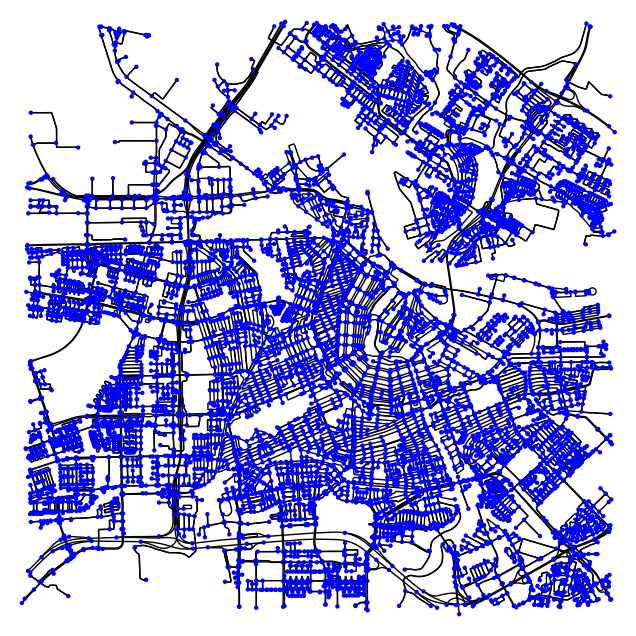

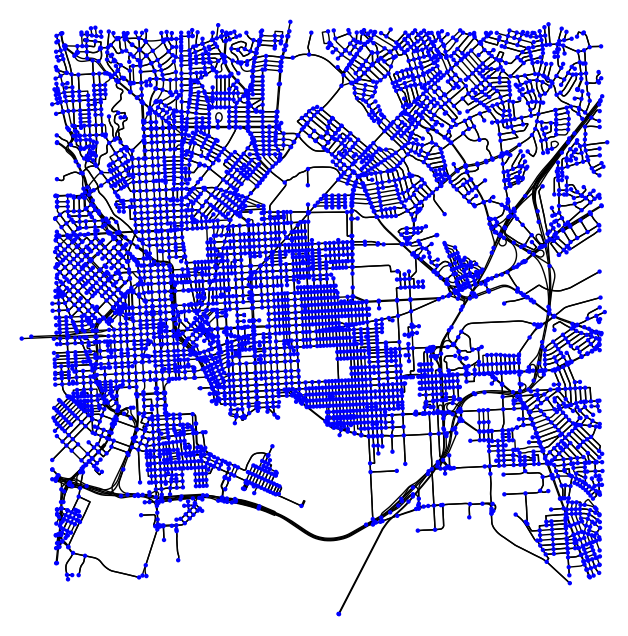

In [4]:
import os  # for file operations
import pandas as pd  # for reading the csv file
import joblib
import logging

logging.basicConfig(level=logging.ERROR, format='%(asctime)s - %(levelname)s - %(message)s',filename='jupyter.log', filemode='w')

#
sub_folder = "local_origin_graphs"
local_graph_folder = os.path.join(base_path, sub_folder)
if not os.path.exists(local_graph_folder):
    os.makedirs(local_graph_folder)

print(city_sample_nodes_path)
df = pd.read_csv(city_sample_nodes_path)
print(df['graph_path'])
def create_graphs(row):
    if os.path.exists(row['graph_path']):
        print(f"Graph exists: {row['graph_path']}")
        return True, row['city_name'], row['node_id']
    else:
        print(f"---Graph missing: {row['graph_path']}---")
        # Apply the function asynchronously
    try:
        latlon_point = ast.literal_eval(row['node_latlon'])
        og = origin_graph(origin_point=latlon_point, distance_from_point=point_distance_size,
                          city_name=row["city_name"], network_type=network_type, remove_parallel=True, simplify=True)
    
        og.save_graph(row['graph_path'])
    
        # Plot the origin graph to see if something is obviously wrong
        ox.plot_graph(og.graph, node_color='blue', node_size=5, edge_linewidth=1, edge_color='black', bgcolor='white',
                       save=True, filepath=os.path.join(local_graph_folder, f"{row['city_name']}_{row['node_id']}.png"), show=False)
        logging.error(f"Finished with graph: {row['graph_path']}")
        return True, row['city_name'], row['node_id']

    except Exception as e:
        logging.error(f"error {e} creating {row['graph_path']}")
        return False, row['city_name'], row['node_id'], e
        

# Number of processes to use
num_processes = (joblib.cpu_count()-5)
print(f"Number of processes to use: {num_processes}")

# Collect results from joblib
results = []
try:

    results = joblib.Parallel(n_jobs=1,backend='loky')(
        joblib.delayed(create_graphs)(row) for _, row in df.iterrows()
    )
except Exception as e:
    print(f"Joblib parallel processing error: {e}")
    
for result in results:
    if not result[0]: 
        print(f"failed creating graph {result[1]}{result[2]}. error {result[3]}")
    else:
        print(f"finished creating graph {result[1]}{result[2]}")

print("finished")



In [ ]:

import os  # for file operations
import ast  # for parsing string to tuple
import pandas as pd  # for reading the csv file
import osmnx as ox  # for plotting the graph
import joblib
import logging
logging.basicConfig(level=logging.ERROR, format='%(asctime)s - %(levelname)s - %(message)s',filename='jupyter.log', filemode='w')


sub_folder = "local_origin_graphs"
local_graph_folder = os.path.join(base_path, sub_folder)
if not os.path.exists(local_graph_folder):
    os.makedirs(local_graph_folder)

print(city_sample_nodes_path)
df = pd.read_csv(city_sample_nodes_path)


def verify_graphml(row):
    try:
        og = origin_graph.from_graphml(graphml_path=row['graph_path'])

    except Exception as e:
        if os.path.exists(row['graph_path']):
            os.remove(row['graph_path'])
        return f"Error processing graphml file: {e}. Deleting file at {row['graph_path']}."


# Number of processes to use
num_processes = (joblib.cpu_count() - 2)
print(f"Number of processes to use: {num_processes}")

# Collect results from joblib
try:
    results = joblib.Parallel(n_jobs=num_processes,backend='loky')(
        joblib.delayed(verify_graphml)(row) for _, row in df.iterrows()
    )
except Exception as e:
    logging.error(f"Joblib parallel processing error: {e}")
    
for result in results:
    print(result)

In [ ]:
import pandas as pd
local_graph_folder = os.path.join(base_path, "local_origin_graphs")
df = pd.read_csv(city_sample_nodes_path)
df['graph_path'] = df.apply(lambda row: os.path.join(local_graph_folder, f"{row['city_name']}_{row['node_id']}.graphml"), axis=1)
df['random_seed'] = random_seed
df['min_distance'] = min_distance
df['point_distance_size'] = point_distance_size
display(df)
df.to_csv(city_sample_nodes_path, index=False)

In [5]:
# The next step is to add weights to the edges of the graph.
import pandas as pd # for reading the csv file
import joblib # replacing multiprocessing with joblib
df = pd.read_csv(city_sample_nodes_path)
df['weights_added'] = False

#if 'weights_added' not in df.columns:
#    df['weights_added'] = False
def add_graph_weights(row):
    try:
        og = origin_graph.from_graphml(graphml_path=row['graph_path'])
        og.add_simplest_paths_from_origin()
        og.add_weights('deviation_from_prototypical')
        og.add_weights('node_degree')
        og.add_weights('instruction_equivalent')
        og.save_graph(row['graph_path'])
        print(f"Finished with graph: {row['city_name']} node: {row['node_id']}",flush=True)
        return True,row['city_name'],row['node_id']
    except Exception as e:
        print(f"Failed with graph: {row['graph_path']} error {e}",flush=True)
        return False,row['city_name'],row['node_id']
        
# Number of processes to use
num_processes = (joblib.cpu_count()-5)
print(f"Number of processes to use: {num_processes}")
# Collect results from joblib
rows_to_process = []
for idx, row in df.iterrows():
    if not row['weights_added']:
        rows_to_process.append(row)


results = joblib.Parallel(n_jobs=1, backend='multiprocessing')(
    joblib.delayed(add_graph_weights)(row) for row in rows_to_process
)


for result in results:
    if result[0]:
        mask = (df['city_name'] == result[1]) & (df['node_id'] == result[2])
        df.loc[mask, 'weights_added'] = True
df.to_csv(city_sample_nodes_path)

Number of processes to use: 3
Finished with graph: Amsterdam node: 46394761
Finished with graph: Atlanta node: 69162374
Finished with graph: Baltimore node: 49475152


In [ ]:
import pandas as pd # for reading the csv file
import joblib # replacing multiprocessing with joblib
from network_route_analysis.origin_graph import origin_graph
df = pd.read_csv(city_sample_nodes_path)
display(df)
local_odpair_folder = os.path.join(base_path, "od_pair_data")
print(f"odpair data will be stored at {local_odpair_folder}")
os.makedirs(local_odpair_folder, exist_ok=True)


if 'od_pairs_added' not in df.columns:
    df['od_pairs_added'] = False


def get_od_pairs(row):
    try:
        og = origin_graph.from_graphml(graphml_path=row['graph_path'])
        og.create_od_pairs(min_radius=min_od_distance, max_radius=max_od_distance, sample_size=144)
        od_pair_data = og.get_od_pair_data()
        json_path = os.path.join(local_odpair_folder, f"od_pair_{row['city_name']}_{row['node_id']}.json")
        od_pair_data.to_json(json_path, orient="records", default_handler=str, indent=2)
        print(f"Finished finding OD_pairs for graph: {row['city_name']} node: {row['node_id']}")
        return True,row['city_name'],row['node_id']
    except Exception as e:
        print(f"Failed finding OD_pairs for  graph: {row['graph_path']} error {e}")
        return False,row['city_name'],row['node_id']


num_processes = (joblib.cpu_count() - 3)
print(f"Number of processes to use: {num_processes}")



rows_to_process = []
for idx, row in df.iterrows():
    if not row['od_pairs_added']:
        rows_to_process.append(row)

results = joblib.Parallel(n_jobs=1, backend='loky')(
    joblib.delayed(get_od_pairs)(row) for row in rows_to_process
)

for result in results:
    if result[0]:
        mask = (df['city_name'] == result[1]) & (df['node_id'] == result[2])
        df.loc[mask, 'od_pairs_added'] = True

df.to_csv(city_sample_nodes_path)
    

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,city_name,country,region,network_type,node_id,node_latlon,graph_path,weights_added,od_pairs_added
0,0,0,0,0,0,Amsterdam,Nederland,Europe,drive,46394761,"(52.3733989, 4.8780385)",/home/arvidh/Documents/GitHub/proj_full-analys...,True,False
1,1,1,1,1,1,Atlanta,United States,US/Canada,drive,69162374,"(33.677683, -84.4356051)",/home/arvidh/Documents/GitHub/proj_full-analys...,True,False
2,2,2,2,2,2,Baltimore,United States,US/Canada,drive,49475152,"(39.299014, -76.5780612)",/home/arvidh/Documents/GitHub/proj_full-analys...,True,False


In [ ]:

from network_route_analysis import post_processing
import pandas as pd
od_pair_data = pd.read_json("example/origin_od_pairs.json")

od_pair_data = post_processing.label_length_outliers(od_pair_data)
od_pair_data = post_processing.label_gridlike_groups(od_pair_data)

# Before normalizing the complexity, we need to remove the length outliers.
print(f"od-pairs before removing length outliers {len(od_pair_data)}")
od_pair_data = od_pair_data[od_pair_data['length_outliers'] == False]
print(f"od-pairs after removing length outliers {len(od_pair_data)}")
od_pair_data = post_processing.normalize_complexity(od_pair_data)
print(len(od_pair_data))
# The od-pair data contains lists and dictionaries that are not easily saved to a csv file, so we store it as a json file.
# Still, there some columns that need to be serialized to strings such as shapely polygon objects.
od_pair_data.to_json("example/origin_od_pairs.json",orient="records",default_handler=str,indent=2)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

od_pair_data = pd.read_json("example/origin_od_pairs.json")


od_pair_data['closest_strongest_lag'] = abs(od_pair_data['closest_strongest_lag'])

od_pair_data = od_pair_data.sort_values(by="closest_strongest_lag", ascending=True)


city_counts = od_pair_data['city_name'].value_counts()
city_counts.plot(kind='bar')
plt.xlabel('City Name')
plt.ylabel('Number of od-pairs')
plt.title('Number of od-pairs in Each city')
plt.show()